In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import yfinance as yf
import statsmodels.api as sm

In [27]:

# Define the stock tickers and weights for the portfolio
tickers = ['AAPL', 'AMZN', 'MSFT', 'BRK-B', 'GPK', 'TSLA']
stocks = ['AAPL', 'AMZN', 'MSFT', 'BRK-B', 'GPK', 'TSLA']
weights = [0.1, 0.1, 0.15, 0.45, 0.1, 0.1]

# Define the start and end dates for the historical data
start_date = '2015-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

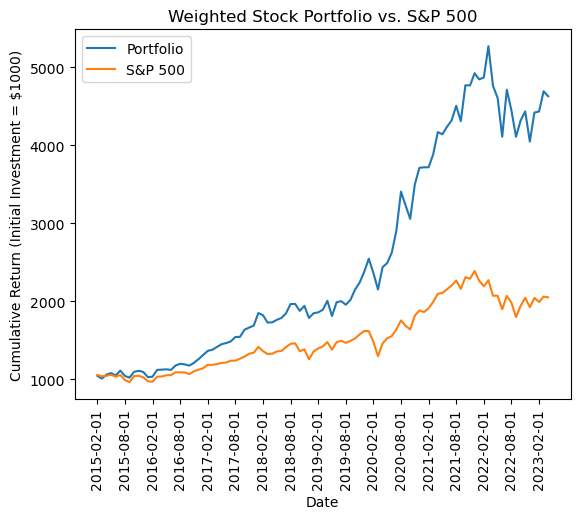

In [28]:
stock_data = pd.DataFrame()
for ticker in tickers:
    data = pd.read_csv(f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={int(datetime.strptime(start_date, "%Y-%m-%d").timestamp())}&period2={int(datetime.strptime(end_date, "%Y-%m-%d").timestamp())}&interval=1mo&events=history&includeAdjustedClose=true')
    data.set_index('Date', inplace=True)
    stock_data[ticker] = data['Adj Close']
    
# Calculate the monthly returns for each stock
stock_returns = stock_data.pct_change().dropna()

# Calculate the weighted monthly returns for the portfolio
portfolio_returns = (stock_returns * weights).sum(axis=1)

# Load the historical data for the S&P 500 using Yahoo Finance
sp500_data = pd.read_csv(f'https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1={int(datetime.strptime(start_date, "%Y-%m-%d").timestamp())}&period2={int(datetime.strptime(end_date, "%Y-%m-%d").timestamp())}&interval=1mo&events=history&includeAdjustedClose=true')
sp500_data.set_index('Date', inplace=True)
sp500_returns = sp500_data['Adj Close'].pct_change().dropna()

# Calculate the cumulative returns for the portfolio and the S&P 500
portfolio_cumulative_returns = (1 + portfolio_returns).cumprod() * 1000
sp500_cumulative_returns = (1 + sp500_returns).cumprod() * 1000

# Create a line graph showing the cumulative returns of the portfolio and the S&P 500
plt.plot(portfolio_cumulative_returns, label='Portfolio')
plt.plot(sp500_cumulative_returns, label='S&P 500')
plt.legend()
plt.title('Weighted Stock Portfolio vs. S&P 500')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (Initial Investment = $1000)')
# Increase interval of xticks to show fewer xticks
x_ticks = range(0, len(portfolio_cumulative_returns), 6)
x_tick_labels = pd.to_datetime(portfolio_cumulative_returns.index)[::6].strftime('%Y-%m-%d')
plt.xticks(x_ticks, x_tick_labels, rotation = 90)
plt.show()


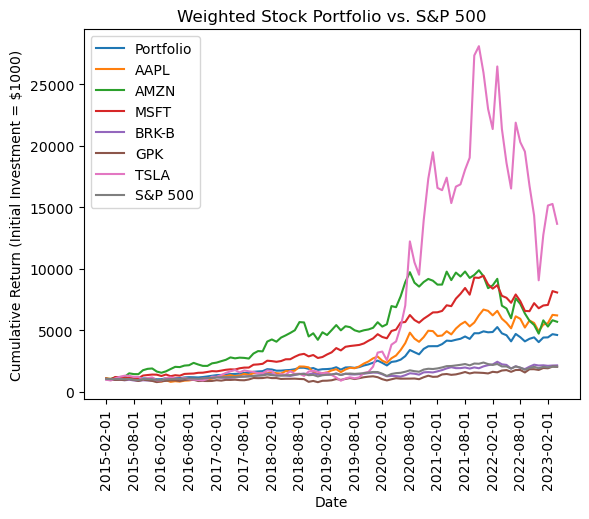

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the historical stock data for the tickers using Yahoo Finance
stock_data = pd.DataFrame()
for ticker in tickers:
    data = pd.read_csv(f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={int(datetime.strptime(start_date, "%Y-%m-%d").timestamp())}&period2={int(datetime.strptime(end_date, "%Y-%m-%d").timestamp())}&interval=1mo&events=history&includeAdjustedClose=true')
    data.set_index('Date', inplace=True)
    stock_data[ticker] = data['Adj Close']

# Calculate the monthly returns for each stock
stock_returns = stock_data.pct_change().dropna()

# Calculate the weighted monthly returns for the portfolio
portfolio_returns = (stock_returns * weights).sum(axis=1)

# Load the historical data for the S&P 500 using Yahoo Finance
sp500_data = pd.read_csv(f'https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1={int(datetime.strptime(start_date, "%Y-%m-%d").timestamp())}&period2={int(datetime.strptime(end_date, "%Y-%m-%d").timestamp())}&interval=1mo&events=history&includeAdjustedClose=true')
sp500_data.set_index('Date', inplace=True)
sp500_returns = sp500_data['Adj Close'].pct_change().dropna()

# Calculate the cumulative returns for the portfolio and the S&P 500
portfolio_cumulative_returns = (1 + portfolio_returns).cumprod() * 1000
stock_cumulative_returns = (1 + stock_returns).cumprod() * 1000
sp500_cumulative_returns = (1 + sp500_returns).cumprod() * 1000

# Create a line graph showing the cumulative returns of the portfolio and the S&P 500
plt.plot(portfolio_cumulative_returns, label='Portfolio')
for ticker in tickers:
    plt.plot(stock_cumulative_returns[ticker], label=ticker)
plt.plot(sp500_cumulative_returns, label='S&P 500')
plt.legend()
plt.title('Weighted Stock Portfolio vs. S&P 500')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (Initial Investment = $1000)')
# Increase interval of xticks to show fewer xticks
x_ticks = range(0, len(portfolio_cumulative_returns), 6)
x_tick_labels = pd.to_datetime(portfolio_cumulative_returns.index)[::6].strftime('%Y-%m-%d')
plt.xticks(x_ticks, x_tick_labels, rotation = 90)
plt.show()


In [30]:
# Get historical price data for the selected tickers and dates
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
# Calculate yearly returns for the portfolio and market
portfolio_returns = data.pct_change().dot(weights).resample('Y').sum()
market_returns = yf.download('^GSPC', start=start_date, end=end_date)['Adj Close'].pct_change().resample('Y').sum()
# Create table of yearly returns for portfolio and market
returns_table = pd.concat([portfolio_returns, market_returns], axis=1)
returns_table.columns = ['Portfolio', 'Market']
print(returns_table)

# Create table of yearly returns for each stock in the portfolio
stock_returns_table = data.pct_change().resample('Y').sum()
stock_returns_table.columns = [ticker + ' Year Returns' for ticker in tickers]
print(stock_returns_table)



[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  1 of 1 completed
            Portfolio    Market
Date                           
2015-12-31   0.100924  0.005018
2016-12-31   0.086771  0.099646
2017-12-31   0.314534  0.179757
2018-12-31  -0.055856 -0.049921
2019-12-31   0.412300  0.261588
2020-12-31   0.501274  0.210538
2021-12-31   0.261044  0.246839
2022-12-31  -0.094253 -0.187106
2023-12-31   0.179197  0.069268
            AAPL Year Returns  AMZN Year Returns  MSFT Year Returns  \
Date                                                                  
2015-12-31           0.014532           0.839594          -0.107128   
2016-12-31           0.144815           0.147730           0.221634   
2017-12-31           0.410777           0.465948           0.201797   
2018-12-31          -0.014373           0.315140           0.055015   
2019-12-31           0.671478           0.233466           0.115060   
2020-12-31   

In [31]:
# Combine the portfolio and S&P 500 cumulative returns into a single DataFrame
combined_returns = pd.concat([portfolio_cumulative_returns, sp500_cumulative_returns], axis=1)
combined_returns.columns = ['Portfolio', 'S&P 500']

# Calculate the value of a $1000 investment in the portfolio and S&P 500 over time
portfolio_value = combined_returns['Portfolio'] / combined_returns['Portfolio'][0] * 1000
sp500_value = combined_returns['S&P 500'] / combined_returns['S&P 500'][0] * 1000

# Combine the portfolio and S&P 500 investment values into a single DataFrame
investment_values = pd.concat([portfolio_value, sp500_value], axis=1)
investment_values.columns = ['Portfolio', 'S&P 500']

# Print the investment values table
investment_values


,Portfolio,S&P 500
Date,,
2015-02-01,1000.000000,1000.000000
2015-03-01,964.959626,982.603893
2015-04-01,1013.914710,990.976484
2015-05-01,1032.187632,1001.373197
2015-06-01,1004.482005,980.332671
...,...,...
2022-12-01,3875.473352,1824.423854
2023-01-01,4232.099166,1937.087241
2023-02-01,4244.377872,1886.505062


In [32]:
# Calculate the difference between the Portfolio and Market columns
difference = returns_table['Portfolio'] - returns_table['Market']

# Add the difference column to the DataFrame
returns_table['Difference'] = difference

# Print the updated DataFrame
returns_table.round(2)


,Portfolio,Market,Difference
Date,,,
2015-12-31,0.10,0.01,0.10
2016-12-31,0.09,0.10,-0.01
2017-12-31,0.31,0.18,0.13
2018-12-31,-0.06,-0.05,-0.01
2019-12-31,0.41,0.26,0.15
2020-12-31,0.50,0.21,0.29
2021-12-31,0.26,0.25,0.01
2022-12-31,-0.09,-0.19,0.09
2023-12-31,0.18,0.07,0.11


In [33]:
stock_returns_table.round(2)

,AAPL Year Returns,AMZN Year Returns,MSFT Year Returns,BRK-B Year Returns,GPK Year Returns,TSLA Year Returns
Date,,,,,,
2015-12-31,0.01,0.84,-0.11,-0.02,0.24,0.17
2016-12-31,0.14,0.15,0.22,0.03,0.17,-0.04
2017-12-31,0.41,0.47,0.20,0.26,0.35,0.44
2018-12-31,-0.01,0.32,0.06,-0.31,0.23,0.23
2019-12-31,0.67,0.23,0.12,0.49,0.47,0.35
2020-12-31,0.71,0.64,0.08,0.12,0.45,2.54
2021-12-31,0.33,0.05,0.27,0.19,0.44,0.55
2022-12-31,-0.24,-0.56,0.06,0.19,-0.27,-0.83
2023-12-31,0.25,0.23,0.00,0.13,0.19,0.51


In [34]:
average_portfolio_return = returns_table['Portfolio'].mean() * 100
average_market_return = returns_table['Market'].mean() * 100
average_portfolio_return

18.954823131314207

In [35]:
average_market_return

9.284755225955342

In [36]:
average_portfolio_return 
print(f"The average performance of the portfolio is {average_portfolio_return:.2f}% per year.")


The average performance of the portfolio is 18.95% per year.


In [37]:
average_market_return
print(f"The average performance of the market is {average_market_return:.2f}% per year.")


The average performance of the market is 9.28% per year.


In [38]:
betas = {}
for stock in stocks:
    # Get stock and market data
    stock_data = yf.download(stock, start=start_date, end=end_date)
    market_data = yf.download('^GSPC', start=start_date, end=end_date)

    # Calculate daily returns
    stock_returns = stock_data['Adj Close'].pct_change().dropna()
    market_returns = market_data['Adj Close'].pct_change().dropna()

    # Regress stock returns against market returns
    X = sm.add_constant(market_returns)
    model = sm.OLS(stock_returns, X)
    results = model.fit()

    # Save the beta coefficient
    betas[stock] = results.params['Adj Close']

# Convert the betas to a dataframe
beta_df = pd.DataFrame.from_dict(betas, orient='index', columns=['Beta'])

beta_df


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Beta
AAPL,1.208904
AMZN,1.116789
MSFT,1.219439
BRK-B,0.884769
GPK,0.826552
TSLA,1.414478


In [39]:
# Get market data
market_data = yf.download('^GSPC', start=start_date, end=end_date)
market_returns = market_data['Adj Close'].pct_change().dropna()

# Calculate betas for each stock
betas = {}
for stock in stocks:
    # Get stock data
    stock_data = yf.download(stock, start=start_date, end=end_date)

    # Calculate daily returns
    stock_returns = stock_data['Adj Close'].pct_change().dropna()

    # Regress stock returns against market returns
    X = sm.add_constant(market_returns)
    model = sm.OLS(stock_returns, X)
    results = model.fit()

    # Save the beta coefficient
    betas[stock] = results.params[1]

# Convert the betas to a dataframe
beta_df = pd.DataFrame.from_dict(betas, orient='index', columns=['Beta'])

# Calculate the weighted average beta of the portfolio
portfolio_beta = (beta_df['Beta'] * weights).sum()

# Print the portfolio beta
print("Portfolio beta:", portfolio_beta)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Portfolio beta: 1.0377341520008285


In [40]:
portfolio_beta

1.0377341520008285

In [41]:
risk_adjusted_performance = average_portfolio_return / portfolio_beta 
risk_adjusted_performance

18.265586706159667

In [42]:
market_risk_performance = average_market_return / 1
market_risk_performance

9.284755225955342